In [1]:
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('Part1_Case Study _9.csv')
df.head()

,Price,Acres,Years Old,DoM
0,330.0,0.23,4,127
1,400.0,0.17,5,98
2,416.0,0.18,16,105
3,420.0,0.29,80,103
4,496.0,0.52,9,39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      45 non-null     float64
 1   Acres      45 non-null     float64
 2   Years Old  45 non-null     int64  
 3   DoM        45 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.5 KB


# 1. Obtain the summary statistics for the variables and comment on them.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,45.0,391.191111,132.600555,160.0,300.00,378.00,496.00,690.0
Acres,45.0,2.309111,6.778599,0.1,0.24,0.45,0.96,40.0
Years Old,45.0,22.133333,20.304052,3.0,12.00,17.00,23.00,80.0
DoM,45.0,122.022222,91.611951,16.0,62.00,98.00,150.00,412.0


# 2. Comment on the distributions of data for the variables? Are they symmetrical? Skewed?
* Right skewed.
* Log transformations might be helpful

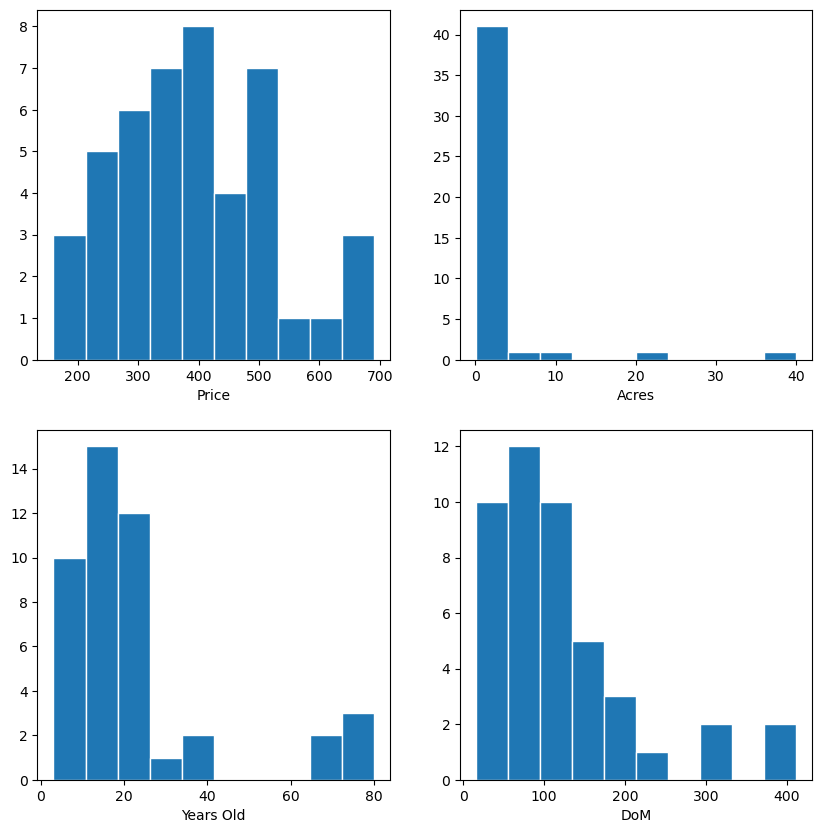

In [6]:
cols = df.columns.to_list()

fig,axs = plt.subplots(2,2,figsize=(10,10))
for i,ax in enumerate(axs.flatten()):
    ax.hist(df[cols[i]],edgecolor='w')
    ax.set_xlabel(cols[i])

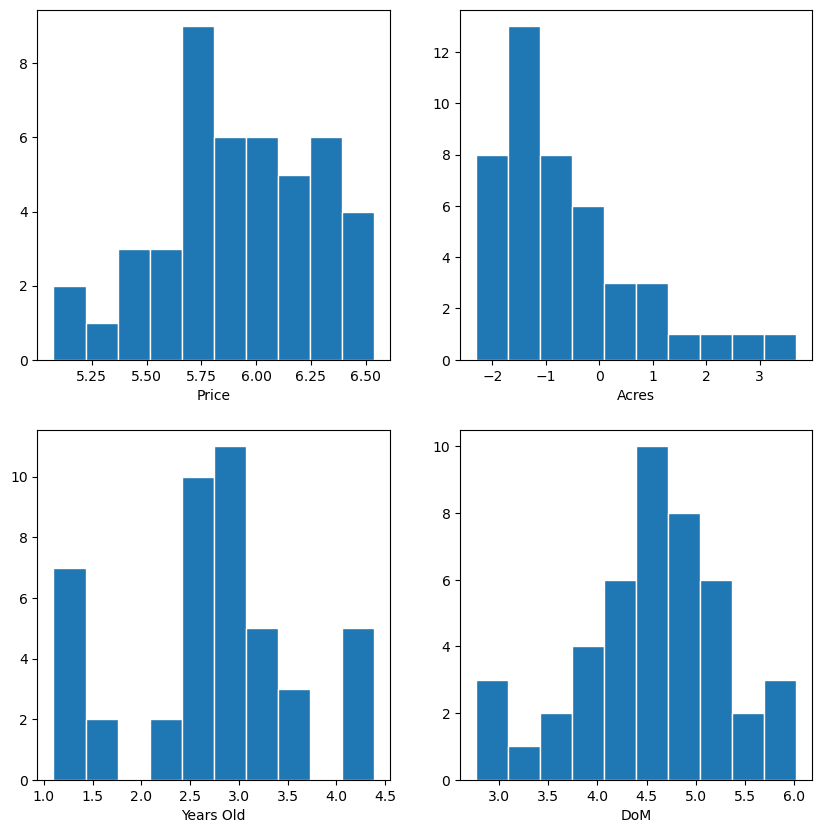

In [13]:
fig,axs = plt.subplots(2,2,figsize=(10,10))
for i,ax in enumerate(axs.flatten()):
    ax.hist(np.log(df[cols[i]]),edgecolor='w')
    ax.set_xlabel(cols[i])

# 3. Obtain the correlations between variables and comment on them?

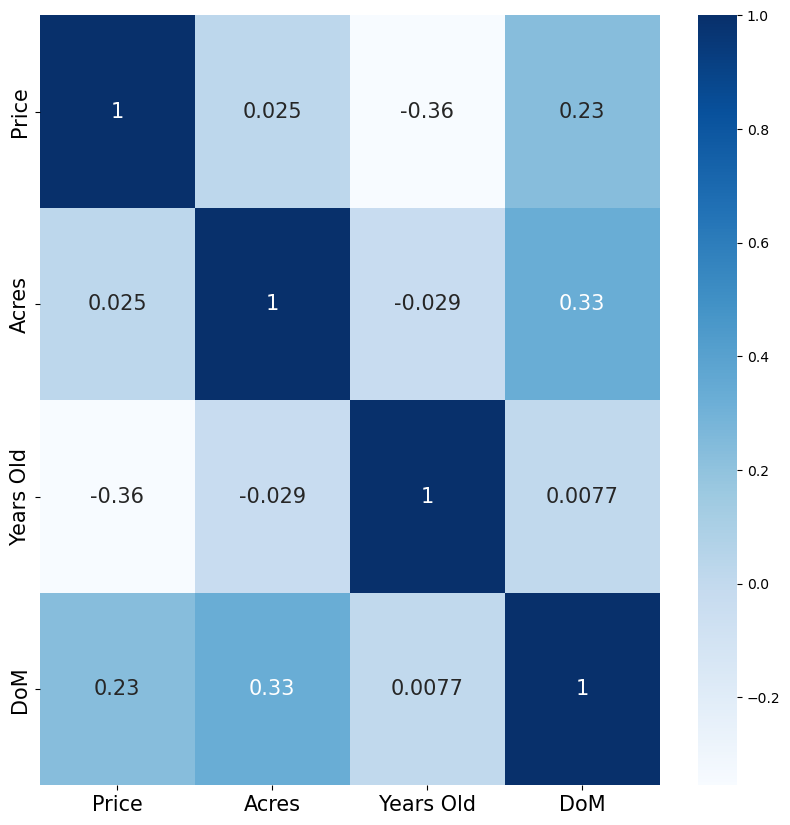

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues',annot_kws={'fontsize':15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# 4. Perform a multiple linear regression analysis with price as the response variable and acres, years and DoM as predictor variables.

In [14]:
df = df.rename(columns={'Years Old':'YearsOld'})

In [26]:
fm1 = 'Price ~ Acres + YearsOld + DoM'
model1 = smf.ols(formula=fm1,data=df).fit()

fm2 = 'Price ~ YearsOld + DoM'
model2 = smf.ols(formula=fm2,data=df).fit()

fm3 = 'Price ~ YearsOld'
model3 = smf.ols(formula=fm3,data=df).fit()

results = Stargazer([model1,model2,model3])
results.show_model_numbers(False)
results.custom_columns(['Model 1','Model 2','Model 3'],[1,1,1])
results.show_degrees_of_freedom(False)
results

In [27]:
fm4 = 'np.log(Price) ~ Acres + YearsOld + DoM'
model4 = smf.ols(formula=fm4,data=df).fit()

fm5 = 'np.log(Price) ~ np.log(Acres) + YearsOld + DoM'
model5 = smf.ols(formula=fm5,data=df).fit()

fm6 = 'np.log(Price) ~ np.log(Acres) + np.log(YearsOld) + DoM'
model6 = smf.ols(formula=fm6,data=df).fit()

fm7 = 'np.log(Price) ~ np.log(Acres) + np.log(YearsOld) + np.log(DoM)'
model7 = smf.ols(formula=fm7,data=df).fit()



results = Stargazer([model4,model5,model6,model7])
results.show_model_numbers(False)
results.custom_columns(['Model 4','Model 5','Model 6','Model 7'],[1,1,1,1])
results.show_degrees_of_freedom(False)
results

# 5. State the regression equation and interpret the regression coefficients.
* Model 1: $ \hat{y} = 401.118 + -1.360(Acres) + 0.370(DoM) + -2.345(Years Old) $

# 6. Comment on the goodness of fit of the regression equation for the data.
* Model 1 (non-log transformed) has the highest $R^2$ at 0.185
* Model 6 has a higher $R^2$ at 0.227, however, it predicts log(Price).
* * If Model 6 is used, it needs its predictions log corrected.

# 7. Explain how you will use the regression equation to predict home prices given the values of the predictor variables.